In [1]:
#############################################################################
# Light curves download and Audio files generation for a mockup application #
# Fast-Evolving Luminous Transient                                          #
# Hesperia Cluster team, at Madrid NASA Space Apps Challenge - 2022         #
#############################################################################

# Kepler & TESS time series analysis, by Lightkurve Collaboration
import lightkurve as lk

# Scatterplot Sonification Package, by Locke Patton and Emily Levesque
from sonipy.sonify import SonifyTool

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
# ***** INTRINSIC CATACLYSMIC FELT (SuperNova-like) ******

# KSN2015k Fast-Evolving Luminous Transient (EPIC 212593538)
star_id = 'EPIC 212593538'

# Query Kepler/K2 and download light_curve
pixel_file = lk.search_targetpixelfile('EPIC 212593538', author="K2", campaign=6).download()
lc_raw = pixel_file.to_lightcurve(aperture_mask='all')
# Remove spurious spikes
_, spurious_cadences = lc_raw.flatten().remove_outliers(return_mask=True)
lc_clean = lc_raw[~spurious_cadences]


In [3]:
# Get axes and start time at 0
flux_axis = lc_clean.flux.value
time_axis = lc_clean.time.value - lc_clean.time.value[0]


In [6]:
print("End time: " + str(time_axis[-1]) + " days")


End time: 78.90764426510577 days


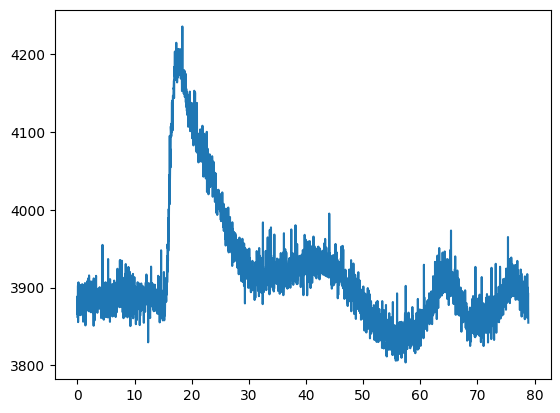

In [4]:
plt.plot(time_axis, flux_axis)
plt.show()


In [ ]:
# Generate WAV adio file from the curve, 5 seconds duration

C4 = 261.6 # Hz
frequency_args = {
  'frequency_min' : C4,
  'frequency_max' : C4*4
}
duration_args = {
  'time_total' : 5000, # ms
}

Tone = SonifyTool(time_axis, flux_axis, duration_args = duration_args, frequency_args = frequency_args)
Tone.save(filename='felt_EPIC212593538.wav')


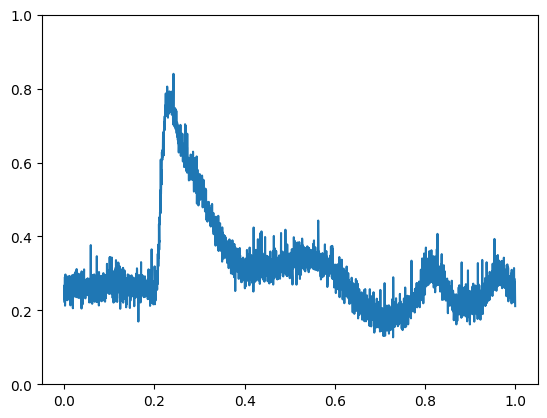

In [7]:
# Normalise flux and time to 1, but scale flux for a big increment at the outburst
flux_axis_norm = ((flux_axis/np.max(flux_axis))-0.88)*7
time_axis_norm = np.linspace(0,1,len(time_axis))
plt.plot(time_axis_norm, flux_axis_norm)
plt.ylim([0, 1])
plt.show()


In [132]:
# Save the curve (time and flux normalised) to a CSV file
df = pd.DataFrame({"time" : time_axis_norm, "flux" : flux_axis_norm})
df.to_csv("felt_EPIC212593538.csv", index=False)
